<a href="https://colab.research.google.com/github/sarthakpruthi/deep-learning-fastai/blob/master/fastai4NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

here we need 3 models

1.language model ie already there as Wikitext103

2.Language model

3.Classifier

In [0]:
from fastai import *
from fastai.text import *

In [3]:
paths=untar_data(URLs.IMDB_SAMPLE)
paths.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df=pd.read_csv(paths/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [6]:
data_lm=TextLMDataBunch.from_csv(paths,'texts.csv')

In [7]:
data_lm.show_batch()

idx,text
0,bet the studios are still trying figure out how they could screw up up so badly . \n \n xxmaj the absolute best thing about this movie was xxmaj stacey xxmaj dash ... the xxmaj asian chick was n't too bad neither . xxmaj these too gals carried the whole movie . xxmaj if it were n't for them i would have destroyed my copy of this movie .
1,"lake was just another show to entertain the xxunk trailer park mother with a xxmaj xxunk cigarette hanging out of her mouth while breast feeding one of her dozens of toothless , illiterate children . xxmaj the xxmaj english language and other xxunk of mankind where ruined by this shows existence . xxmaj xxunk xxunk from xxmaj girl you a xxmaj xxunk xxmaj head and so on . xxmaj how"
2,a friend . xxmaj so what ? xxmaj get over it ! xxmaj the only good part and i do n't want to sound mean - spirited was when the fox got shot and died at the end . i laughed my head off in xxunk because this cartoon sucked so much . xxmaj the bad news is the fox xxunk and becomes a ghost . i wish he had
3,"wrote , edited and directed ) and xxmaj joey xxmaj xxunk -- not exactly names that scream out "" quality "" . xxmaj and with such xxunk skits as "" xxmaj xxunk taking a xxunk "" ( it 's exactly what it sounds like ) , a guy who robs a xxunk bank ( the "" xxmaj rhymer "" ) , xxunk with a rotting corpse , black market xxunk"
4,"xxmaj then comes the convent , which is a pretty difficult scene to screw up . xxmaj thankfully , it was saved . xxmaj after this three minutes of accuracy , however , the movie again begins to xxunk towards xxmaj classic xxmaj novel xxmaj xxunk . \n \n xxmaj as xxmaj cosette and xxmaj valjean are riding through the park , they come across xxmaj marius giving a"


In [0]:
data_lm.save()

Tokenization

In [9]:
data_clas=TextClasDataBunch.from_csv(paths,'texts.csv')

In [10]:
data_clas.show_batch()

text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive


In [0]:
# xxfld: This is a special thing where if you've got like title, summary, abstract, body, (i. e. separate parts of a document),
# each one will get a separate field and so they will get numbered (e.g. xxfld 2).
# xxup: If there's something in all caps, it gets lower cased and a token called xxup will get added to it.

Numericalization

In [11]:
data_clas.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [12]:
data_clas.train_ds[0][0]

Text xxbos xxmaj although a film with xxmaj bruce xxmaj willis is always worth watching , you better skip this one . i watched this one on television , so i did n't have to xxunk down cash for it . xxmaj lucky me . 
 
  xxmaj the plot develops slowly , very slowly . xxmaj although the first 30 minutes or so are quite believable , it gets more and more unbelievable towards the end . xxmaj it is highly questionable , if a seasoned soldier like xxmaj lt . xxmaj waters would disobey direct orders . xxmaj and even if he would , if the rest of his platoon would . xxmaj they know he puts them in direct danger , and they know they will certainly die if they follow him , but what the heck , he is our xxmaj lt . so let 's do what he says ( despite the direct orders , remember ) . 
 
  xxmaj still , there are some nice scenes in this movie . xxmaj they somewhat save a village , where the total population is being xxunk by the rebels . xxmaj well , they save a dozen xxunk or so , the rest was alre

In [13]:
data_clas.train_ds[0][0].data[:10]

array([   2,    5,  331,   13,   32,   30,    5, 2778,    5, 3221])

In [0]:
#this does both tokenization and numericalization

In [15]:
#  data=(TextList.from_csv(path,'texts.csv',col='text')
#                          .split_from_df(col=2)
#                          .label_from_df(cols=0)
#                          .databunch())
#this generates error
 data_lm = (TextList.from_csv(paths, 'texts.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct()
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()
           #Label it for a language model
           .databunch())
           #Finally we convert to a DataBunch

In [2]:
path=untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/unsup')]

In [17]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [4]:
data_lm=(TextList.from_folder(path)
                  .filter_by_folder(include=['train','test'])
                  .split_by_rand_pct(0.1)
                  .label_for_lm()
                  .databunch())

In [0]:
data_lm.save('tm_lm')

In [20]:
data_lm.show_batch()

idx,text
0,"and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals"
1,"her friends wanted to see it over xxmaj happy xxmaj feet . \n \n ... i never saw xxmaj happy xxmaj feet , but i am sure it is better than this ... movie ? xxmaj anyway , we did n't actually expect it to be good ... we actually went in just to laugh at it . xxmaj cool with me ... i have a problem with ruining"
2,bunch that you do n't really care what happens to them . xxmaj the disjointed story should have focused more on the spirit than that of these bland characters who have one unconvincing group relationship . xxmaj it just overplayed its cards by becoming overly muddled and taking too long to get going that when it comes to the climax it 's just plain ludicrous . xxmaj the film 's
3,amusing though unsophisticated nature . i think that 's where the problem lies - xxmaj the gags are n't all that amusing with the unsophisticated nature starting to show its age . xxmaj did we need another movie that uses a man dressed up as a woman in order to drive the plot ? xxmaj perhaps the worst criticism i can make is that i saw xxup carry xxup on
4,"xxup dreamscapes can only be seen as the absolute nadir of the genre that began so xxunk with xxup the xxup twilight xxup zone and xxup the xxup outer xxup limits . \n \n xxmaj of course , part of the problem is that it does nothing to be of any interest to a comparatively adult audience , instead aiming at xxup ten - xxup year - xxup olds"


In [13]:
#not working
#learn = language_model_learner(data_lm,arch=AWD_LSTM, drop_mult=0.3)
#learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_FWD, drop_mult=0.3)
learn = language_model_learner(data_lm, AWD_LSTM)


#language model is a model that learns to predict what would be next word of a sentence

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


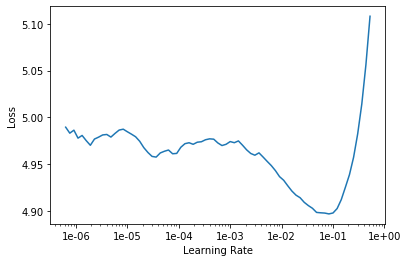

In [23]:
learn.recorder.plot(skip_end=15)

In [30]:
learn.fit_one_cycle(1,slice(4e-3,1e-2),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.100799,3.894364,0.310306,21:13


In [0]:
learn.save('fit_head')

In [26]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (45000 items)
x: LMTextList
xxbos xxmaj this is actually a pretty bad film . xxmaj the ideology is not as perverse as in those films xxmaj collins made later . xxmaj however , my main misgivings about the film are that it is implausible and quite frankly boring for a long time . xxmaj the whole concept of an ex - xxup sas man joining terrorists for no particular reason is n't very convincing and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals but the story does n't carry a feature film . xxmaj although reasonably successful at the time this film initiated the demise of xxmaj collins ' career who in the eigh

In [0]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


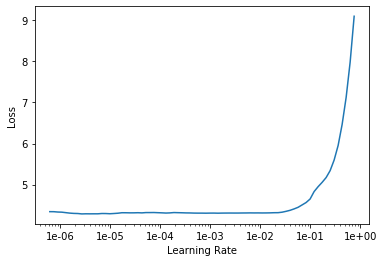

In [29]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(1,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,3.978091,3.883215,0.311309,21:14


In [0]:
learn.save('fine_tuned')

In [33]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (45000 items)
x: LMTextList
xxbos xxmaj this is actually a pretty bad film . xxmaj the ideology is not as perverse as in those films xxmaj collins made later . xxmaj however , my main misgivings about the film are that it is implausible and quite frankly boring for a long time . xxmaj the whole concept of an ex - xxup sas man joining terrorists for no particular reason is n't very convincing and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals but the story does n't carry a feature film . xxmaj although reasonably successful at the time this film initiated the demise of xxmaj collins ' career who in the eigh

In [17]:
learn.predict('I liked this movie because ', 100, temperature=1.1,min_p=0.001)

'I liked this movie because  of the " good record " . However , he said that it was not entirely a " plot " , for he enjoyed playing cards and could come as a man , who is " the guy who first broke into the community . " His involvement in the film was a significant factor at the time the film \'s directors also wanted to record in a similar manner , which proved problematic for Sony . Even with his son Larry , the film \'s biggest feature was its success on television .'

In [0]:
learn.save_encoder('fine_tuned_enc')#the second part is about predicting next part,but we want it to understand which is encoder

In [0]:
#now here our language model is ready

Classifier

In [5]:
data_clas=(TextList.from_folder(path,vocab=data_lm.vocab)
                       .split_by_folder(valid='test')
                       .label_from_folder(classes=['neg','pos'])
                       .databunch(bs=50))
data_clas.save('tm_clas')

In [18]:
data_clas=TextClasDataBunch.load(path,'tmp_clas',bs=50)
data_clas.show_batch

ValueError: ignored

In [19]:
learn=text_classifier_learner(data_clas,dropout_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

TypeError: ignored

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,moms=(0.8,0.7))

In [0]:
learn.save(first)

In [0]:
learn.load('first')

In [0]:
learn.freeze_to(-2)#this means unfreeze last 2 layers
learn.fit_one_cycle(1)

In [0]:
learn.save('second')
learn.load('second')

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1,moms=(0.8,0.7))

In [0]:
learn.save('third')
learn.load('third')

In [0]:
learn.predict('I really loved that movie, it was awesome!')

tabular